In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings

from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro
from scipy.stats import ttest_1samp

%matplotlib inline
warnings.filterwarnings('ignore')

# 이항분포 실습

In [2]:
n = 4
for i in range(n+1):
    prob = stats.binom.pmf(k = i, n = n, p = 0.3)
    print('5대의 차량을 임의로 선택했을 때 불량대수 {}대 일 때 나올 확률은 ? {:3f}'.format(i, prob))

5대의 차량을 임의로 선택했을 때 불량대수 0대 일 때 나올 확률은 ? 0.240100
5대의 차량을 임의로 선택했을 때 불량대수 1대 일 때 나올 확률은 ? 0.411600
5대의 차량을 임의로 선택했을 때 불량대수 2대 일 때 나올 확률은 ? 0.264600
5대의 차량을 임의로 선택했을 때 불량대수 3대 일 때 나올 확률은 ? 0.075600
5대의 차량을 임의로 선택했을 때 불량대수 4대 일 때 나올 확률은 ? 0.008100


# 정규분포 실습

In [3]:
x = 180
mu = 175.5
sd = 5.98
prob = stats.norm.cdf(x,mu,sd)
print('평균이 175, 표준편차 5일 때, 나의 키가 180cm 일 경우에는 {:.1F}% 범위에 위치한다.'.format(prob*100))

평균이 175, 표준편차 5일 때, 나의 키가 180cm 일 경우에는 77.4% 범위에 위치한다.


# 정규성 검정 실습

In [4]:
ds_t_test = pd.read_csv("/home/piai/빅데이터/1. Big Data 분석 기초/2sample_t_test.csv")
ds_t_test.head()

Mat_A  Mat_B  Total  Sub
0   73.4   68.7   73.4    1
1   77.0   71.4   77.0    1
2   73.7   69.8   73.7    1
3   73.3   75.3   73.3    1
4   73.1   71.3   73.1    1

In [5]:
ds_t_test.describe()

Mat_A      Mat_B      Total        Sub
count  10.000000  10.000000  20.000000  20.000000
mean   74.810000  71.080000  72.945000   1.500000
std     2.170228   2.541128   2.991827   0.512989
min    71.500000  66.900000  66.900000   1.000000
25%    73.325000  69.875000  71.025000   1.000000
50%    74.100000  70.750000  73.200000   1.500000
75%    76.850000  72.375000  74.700000   2.000000
max    77.700000  75.300000  77.700000   2.000000

In [6]:
ds_t_test.isnull().sum()

Mat_A    10
Mat_B    10
Total     0
Sub       0
dtype: int64

In [7]:
ds_t_test.dtypes

Mat_A    float64
Mat_B    float64
Total    float64
Sub        int64
dtype: object

In [8]:
ds_t_test.dropna(axis=0, inplace = True)

#### 정규성 검정
#### 귀무가설 : 정규분포를 따른다.
#### 대립가설 : 정규분포를 따르지 않는다.

In [9]:
Mat_A = ds_t_test['Mat_A']
stats.shapiro(Mat_A)

ShapiroResult(statistic=0.906264066696167, pvalue=0.2563020884990692)

In [10]:
Mat_B = ds_t_test['Mat_B']
stats.shapiro(Mat_B)

ShapiroResult(statistic=0.9729753732681274, pvalue=0.9169775247573853)

#### 2sample_t_test 데이터의 Mat_A, Mat_B컬럼의 정규성 검정결과
#### a = 0.05
#### Mat_A의 p_value = 0.256, Mat_B의 p_value 0.917
#### 귀무가설(H0) 정규성을 따른다는 가정에서 귀무가설 채택
#### Mat_A, Mat_B의 컬럼은 둘 다 정규성을 따른다

# 신뢰구간 실습 (정규분포)

In [69]:
sample = {'sample':[18,18,20,21,20,23,19,18,17,21,22,20,20,21,20,19,19,18,17,19]}

In [70]:
df = pd.DataFrame(data = sample)
df.head()

sample
0      18
1      18
2      20
3      21
4      20

In [71]:
lower, upper = stats.norm.interval(0.95, loc = np.mean(df), scale = 3.8/np.sqrt(20))
print("신뢰구간: ({},{})".format(lower.round(2), upper.round(2)))

신뢰구간: ([17.83],[21.17])


#### 모평균이 [17.83,21.17] 구간에 포함될 확률 95%

# 신뢰구간 실습 (t-분포)

In [14]:
sample = {'sample':[73,71,74,69,70,73,70,68,75,72,70,72,73,70,70,72,71,71,75,72]}

In [15]:
df = pd.DataFrame(data = sample)
df.head()

sample
0      73
1      71
2      74
3      69
4      70

In [16]:
lower, upper = stats.t.interval(0.95, len(df)-1, loc = np.mean(df), scale = stats.sem(df))
print("신뢰구간: ({},{})".format(lower.round(2), upper.round(2)))

신뢰구간: ([70.66],[72.44])


#### 모평균이 [70.66, 72.44] 구간에 포함될 확률 95%

# 1-sample T-test (양측 검정)

#### 귀무가설 : 고객서비스 센터의 고객만족도는 78.0이다.
#### 대립가설 : 고객서비스 센터의 고객만족도는 78.0이 아니다.
#### a = 0.05

In [17]:
sample = {'sample': [85.0,79.0,79.1,79.9,81.6,78.6,85.4,83.4,78.1,79.2]}
df = pd.DataFrame(sample)
df.boxplot(['sample'])

<AxesSubplot:>

#### 정규성 검정
#### 귀무가설 : 정규분포를 따른다.
#### 대립가설 : 정규분포를 따르지 않는다.
#### a = 0.05

In [18]:
statistic, p = stats.shapiro(df['sample'])
print("statistic = {}, p-value = {}".format(statistic, p))

statistic = 0.8473217487335205, p-value = 0.0539751797914505


In [19]:
t_result = stats.ttest_1samp(df, 78)
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("1-Sample t-test")
print("t 통계량: {}".format(t))
print("p-value: {}".format(p))

1-Sample t-test
t 통계량: [3.379]
p-value: [0.008]


#### p-value 0.008이므로 귀무가설 기각
#### 고객서비스 센터의 서비스는 78.0이 아니다.

# 2-sample T-test (양측 검정)

#### 귀무가설 : A, B 데이터간 모평균에 차이가 없다.
#### 대립가설 : A, B 데이터간 모평균에 차이가 있다.
#### a = 0.05

In [20]:
sample = {'A': [1.883,1.715,1.799,1.768,1.711,1.832,1.427,1.344],
         'B': [1.435,1.572,1.486,1.511,1.457,1.548,1.404,1.883]}
df = pd.DataFrame(sample)
df

A      B
0  1.883  1.435
1  1.715  1.572
2  1.799  1.486
3  1.768  1.511
4  1.711  1.457
5  1.832  1.548
6  1.427  1.404
7  1.344  1.883

<AxesSubplot:>

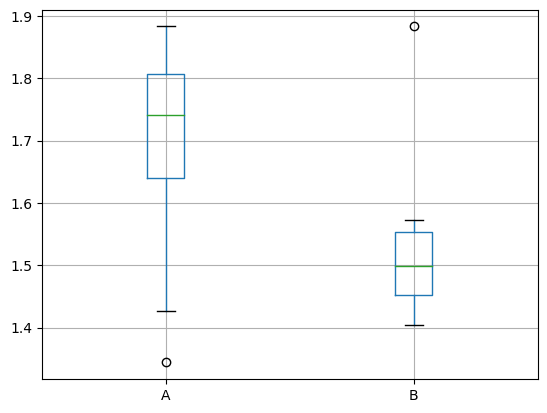

In [21]:
df.boxplot(['A','B'])

#### 정규성 검정
#### 귀무가설 : 정규분포를 따른다.
#### 대립가설 : 정규분포를 따르지 않는다.
#### a = 0.05

In [22]:
statistic, p = stats.shapiro(df['A'])
print('statistic = {}, p-value={}'.format(statistic, p))

statistic = 0.8425754904747009, p-value=0.08004532009363174


In [23]:
statistic, p = stats.shapiro(df['B'])
print('statistic = {}, p-value={}'.format(statistic, p))

statistic = 0.7734811902046204, p-value=0.014793740585446358


#### 'A' 데이터는 p-value 0.08로 귀무가설 채택 => 'A' 데이터는 정규분포를 따른다.
#### 'B' 데이터는 p-value 0.05로 귀무가설 기각 => 'B' 데이터는 정규분포를 따르지 않는다.
#### 비모수 추론으로 검정

In [47]:
t_result = stats.mannwhitneyu(df['A'], df['B'])

In [48]:
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

In [49]:
print('2-sample t-test')
print('t: {}'.format(t))
print('p: {}'.format(p))

2-sample t-test
t: 33.0
p: 0.305


#### p-value 0.305 귀무가설 채택
#### A, B 데이터간 모평균에 차이가 없다.

# 2-sample T-test2 (양측 검정)

#### 귀무가설 : 회사원들의 성적은 학원가기 전후에 대해 차이가 없다.
#### 대립가설 : 회사원들의 성적은 학원가기 전후에 대해 차이가 있다.
#### a = 0.05

In [55]:
sample = {'after': [720,589,780,648,720,589,780,648,780,648],
         'before': [710,580,787,712,750,600,782,670,790,680]}
df = pd.DataFrame(sample)
df

after  before
0    720     710
1    589     580
2    780     787
3    648     712
4    720     750
5    589     600
6    780     782
7    648     670
8    780     790
9    648     680

<AxesSubplot:>

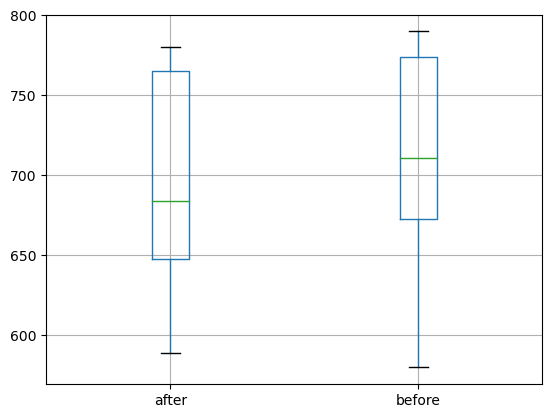

In [56]:
df.boxplot(['after','before'])

#### 정규성 검정
#### 귀무가설 : 정규분포를 따른다.
#### 대립가설 : 정규분포를 따르지 않는다.
#### a = 0.05

In [57]:
statistic, p = stats.shapiro(df['after'])
print('statistic = {}, p-value={}'.format(statistic, p))

statistic = 0.8713098764419556, p-value=0.10353978723287582


In [58]:
statistic, p = stats.shapiro(df['before'])
print('statistic = {}, p-value={}'.format(statistic, p))

statistic = 0.9132594466209412, p-value=0.304139107465744


#### 'after' 데이터는 p-value 0.1로 귀무가설 채택 => 'after' 데이터는 정규분포를 따른다.
#### 'before' 데이터는 p-value 0.3로 귀무가설 채택 => 'before' 데이터는 정규분포를 따른다.


#### 등분산성 검정
#### 귀무가설 : 분포 간 분산이 같다.
#### 대립가설 : 분포 간 분산이 다르다.
#### a = 0.05

In [59]:
stats.bartlett(df['after'], df['before'])

BartlettResult(statistic=0.001439637370944973, pvalue=0.9697334846225945)

#### p-value 0.96 귀무가설 채택 => 두 분포는 분산이 같다.

In [67]:
t_result = stats.ttest_rel(df['after'], df['before'])
t, p = t_result.statistic.round(4), t_result.pvalue.round(4)
print('2-sample t-test')
print('t: {}'.format(t))
print('p: {}'.format(p))

NameError: name 'stats' is not defined

#### p-value 0.497 귀무가설 채택 => 회사원들의 성적은 학원가기 전후가 같다.

# 1 Proportion test

#### 귀무가설: 모집단 비율(0.5)이 귀무가설의 비율와 같다.
#### 대립가설:  모집단 비율(0.5)이 귀무가설의 비율와 다르다.
#### a = 0.05

In [62]:
count = 40
n_obs = 100
value = 0.5

stats, pval = proportions_ztest(count, n_obs, value)

print('1 Proportion test')
print('z: {:0.3f}'.format(stats))
print('p: {:0.3f}'.format(pval))

1 Proportion test
z: -2.041
p: 0.041


#### p-vale 0.041 귀무가설 기각 => 모집단 비율이 귀무가설의 비율이 다르다

# 2 Proportion test

#### 귀무가설: 두 공장의 불량률이 같다.
#### 대립가설: 두 공장의 불량률이 다르다.
#### a = 0.05

In [34]:
count = np.array([14,5])
nobs = np.array([1200,1200])

stats, pval = proportions_ztest(count,nobs)

print('2 Proportion test')
print('z: {:0.3f}'.format(stats))
print('p: {:0.3f}'.format(pval))

2 Proportion test
z: 2.073
p: 0.038


#### p-value는 0.038 귀무가설 기각 => 두 공장의 불량율이 다르다.

# 동일성 검정 실습

#### 귀무가설: 각 제품에 대한 이미지 차이가 존재하지 않는다.
#### 대립가설: 각 제품에 대한 이미지 차이가 존재한다.
#### a = 0.05

In [37]:
sample= {'A': [18,1,8,7,10,9,10],
         'B': [8,2,14,5,5,9,4],
         'C': [4,1,3,4,9,5,4],
         'D': [4,1,2,3,2,7,3],
         'E': [3,1,3,1,1,1,1],
         'F': [3,25,8,10,2,1,7]}

df = pd.DataFrame(sample)

chi,pval,dof,expected = stats.chi2_contingency(df)

print('chi-square test')
print('chisq: {:0.3f}'.format(chi))
print('p: {:0.3f}'.format(pval))
print('degree of freedom: {}'.format(dof))
print('expected value: {}'.format(expected.round(3)))

chi-square test
chisq: 98.274
p: 0.000
degree of freedom: 30
expected value: [[11.004  8.21   5.24   3.843  1.921  9.782]
 [ 8.528  6.362  4.061  2.978  1.489  7.581]
 [10.454  7.799  4.978  3.651  1.825  9.293]
 [ 8.253  6.157  3.93   2.882  1.441  7.336]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]
 [ 8.803  6.568  4.192  3.074  1.537  7.825]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]]


#### p-value 0으로 귀무가설 기각 => 각 제품에 대한 이미지 차이가 존재한다.

# ANOVA 실습

In [38]:
sample=pd.read_csv("/home/piai/빅데이터/1. Big Data 분석 기초/ANOVA.csv")
sample

time charge gangjong type
0   32.2      A        a    a
1   30.4      B        a    a
2   33.6      C        a    a
3   36.4      D        a    a
4   33.9      E        a    a
5   34.9      F        a    a
6   33.1      A        b    a
7   29.9      B        b    a
8   31.7      C        b    a
9   27.5      D        b    a
10  34.0      E        b    a
11  30.7      F        b    a
12  32.6      A        c    b
13  32.7      B        c    b
14  29.3      C        c    b
15  25.9      D        c    b
16  31.1      E        c    b
17  23.8      F        c    b
18  26.7      A        d    b
19  28.5      B        d    b
20  30.9      C        d    b
21  26.2      D        d    b
22  32.3      E        d    b
23  23.7      F        d    b

In [39]:
gangjong = sample.groupby('gangjong')['time'].apply(list).to_dict()
df_gangjong = pd.DataFrame(gangjong)
df_gangjong

a     b     c     d
0  32.2  33.1  32.6  26.7
1  30.4  29.9  32.7  28.5
2  33.6  31.7  29.3  30.9
3  36.4  27.5  25.9  26.2
4  33.9  34.0  31.1  32.3
5  34.9  30.7  23.8  23.7

<AxesSubplot:>

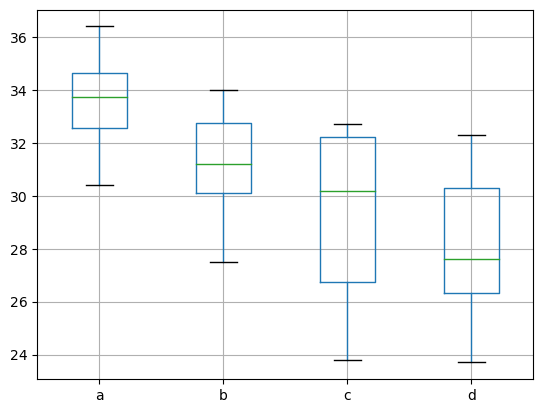

In [40]:
%matplotlib inline

df_gangjong.boxplot(['a','b','c','d'])

#### 귀무가설: 강종별 2차정련 시간에 차이가 없다.
#### 대립가설: 강종별 2차정련 시간에 차이가 있다.
#### a = 0.05

In [41]:
f_result = stats.f_oneway(df_gangjong['a'],df_gangjong['b'],df_gangjong['c'],df_gangjong['d'])

f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("One - way")
print(" F 통계량 : {}".format(f))
print(" p 통계량 : {}".format(p))

One - way
 F 통계량 : 4.172
 p 통계량 : 0.019


#### p-value 0.019로 귀무가설 기각 => 강종별 2차정련 시간에 차이가 있다.

In [42]:
type1 = sample.groupby('type')['time'].apply(list).to_dict()
df_type = pd.DataFrame(type1)
df_type

a     b
0   32.2  32.6
1   30.4  32.7
2   33.6  29.3
3   36.4  25.9
4   33.9  31.1
5   34.9  23.8
6   33.1  26.7
7   29.9  28.5
8   31.7  30.9
9   27.5  26.2
10  34.0  32.3
11  30.7  23.7

In [43]:
%matplotlib inline

df_type.boxplot(['a','b'])

<AxesSubplot:>

#### 귀무가설: 타입별 2차정련 시간에 차이가 없다.
#### 대립가설: 타입별 2차정련 시간에 차이가 있다.
#### a = 0.05

In [44]:
f_result = stats.f_oneway(df_type['a'],df_type['b'])

f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("One - way")
print(" F 통계량 : {}".format(f))
print(" p 통계량 : {}".format(p))

One - way
 F 통계량 : 9.654
 p 통계량 : 0.005


#### p-value 0.005로 귀무가설 기각 => 타입별 2차정련 시간에 차이가 있다.

# 상관관계 실습

#### 귀무가설: 온도와 강직도는 상관 계수가 0이다.
#### 대립가설: 온도와 강직도는 상관 계수가 0이 아니다.

In [65]:
sample = {'Strength': [37.6,38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5],
         'Temperature': [14,15,14,16,17,14,17,16,15,16,14,16,18,13,15,17,14,16,20,21]}
corr, pval = stats.pearsonr(sample['Strength'], sample['Temperature'])

print('Correlation Analysis')
print('corr: {:0.3f}'.format(corr))
print('p-value: {:0.3f}'.format(pval))

Correlation Analysis
corr: -0.723
p-value: 0.000


#### p-value 0으로 귀무가설 기각 => 온도와 강직도는 상관계수가 0이 아니다.
#### corr -0.723 온도와 강직도는 강한 음의 상관관계를 가진다.

In [73]:
sample=pd.read_csv("/home/piai/빅데이터/1. Big Data 분석 기초/ANOVA.csv")
sample

time charge gangjong type
0   32.2      A        a    a
1   30.4      B        a    a
2   33.6      C        a    a
3   36.4      D        a    a
4   33.9      E        a    a
5   34.9      F        a    a
6   33.1      A        b    a
7   29.9      B        b    a
8   31.7      C        b    a
9   27.5      D        b    a
10  34.0      E        b    a
11  30.7      F        b    a
12  32.6      A        c    b
13  32.7      B        c    b
14  29.3      C        c    b
15  25.9      D        c    b
16  31.1      E        c    b
17  23.8      F        c    b
18  26.7      A        d    b
19  28.5      B        d    b
20  30.9      C        d    b
21  26.2      D        d    b
22  32.3      E        d    b
23  23.7      F        d    b

In [82]:
gangjong = sample.groupby('gangjong')['time'].apply(list).to_dict()
gangjong

{'a': [32.2, 30.4, 33.6, 36.4, 33.9, 34.9],
 'b': [33.1, 29.9, 31.7, 27.5, 34.0, 30.7],
 'c': [32.6, 32.7, 29.3, 25.9, 31.1, 23.8],
 'd': [26.7, 28.5, 30.9, 26.2, 32.3, 23.7]}